In [1]:
import pandas as pd

# Read the dataset from the csv on Kaggle
df = pd.read_csv('user_behavior_dataset.csv')

In [2]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   

In [3]:
# Data Overview
print("\nData Overview:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None

Descriptive Statistics:
         User ID  App Usage Time (min/day)  S

In [4]:
# Unique counts for categorical columns
categorical_columns = ['Device Model', 'Operating System', 'Age', 'Gender']
print("\nUnique Counts for Categorical Columns:")
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].nunique()}")


Unique Counts for Categorical Columns:
Unique values in Device Model: 5
Unique values in Operating System: 2
Unique values in Age: 42
Unique values in Gender: 2


In [5]:
# Checking for missing values
print("\nMissing Values Summary:")
print(df.isnull().sum())


Missing Values Summary:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


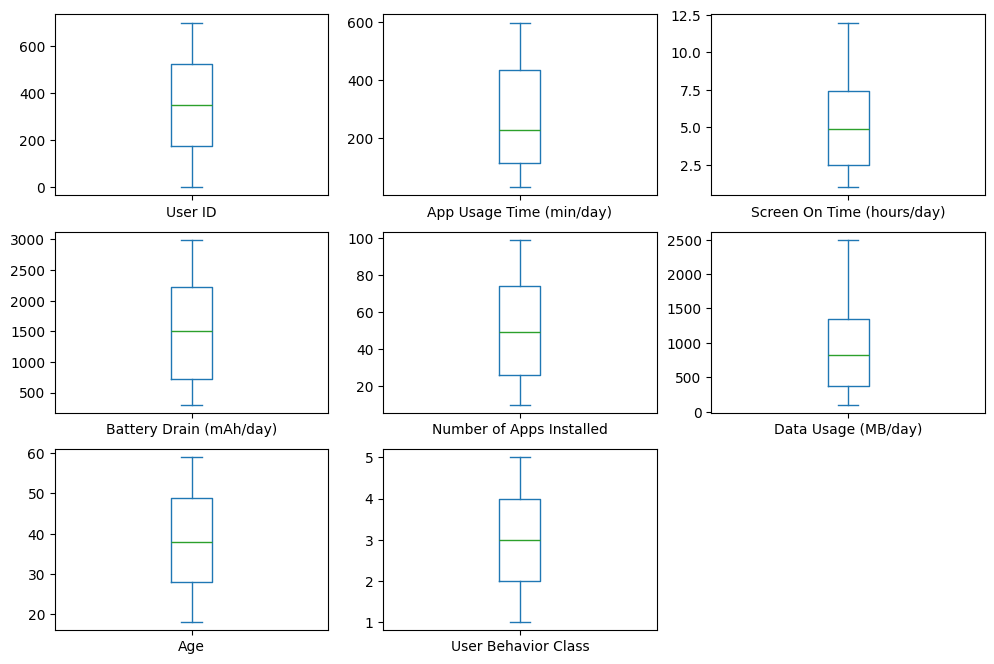

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for all columns containing only numbers to check for outliers
# The first boxplot is just the User ID's and not of any value

df.plot(kind='box', subplots=True, layout=(3,3), figsize=(12,8))
plt.show()


In [7]:
df['Operating System'].value_counts()


Operating System
Android    554
iOS        146
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      364
Female    336
Name: count, dtype: int64

TJR: So both the Operating System column and the Gender columns have binary entries.
For Operating Systems, we are going to convert iOS to zero and Android to one.
For Gender, we are going to convert Male to zero and Female to one.

In [9]:
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
df['Operating System'].replace({'Android': 1, 'iOS': 0}, inplace=True)
df.rename(columns={'Operating System': 'OS_Android=1_iOS=0'}, inplace=True)
df.rename(columns={'Gender': 'Gender_Male=0_Female=1'}, inplace=True)

# Check the updated column names
df.columns

<ipython-input-9-4eb154504e40>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
<ipython-input-9-4eb154504e40>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
<ipython-input-9-4

Index(['User ID', 'Device Model', 'OS_Android=1_iOS=0',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender_Male=0_Female=1',
       'User Behavior Class'],
      dtype='object')

In [10]:
# Verify the data type change
df.dtypes

User ID                         int64
Device Model                   object
OS_Android=1_iOS=0              int64
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender_Male=0_Female=1          int64
User Behavior Class             int64
dtype: object

Now we are gonna re-run the plots for the new columns

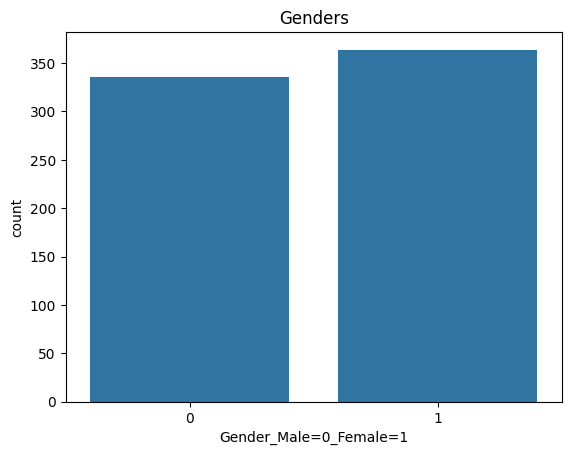

In [11]:
# Create a bar graph
sns.countplot(x='Gender_Male=0_Female=1', data=df)
plt.title('Genders')
plt.show()

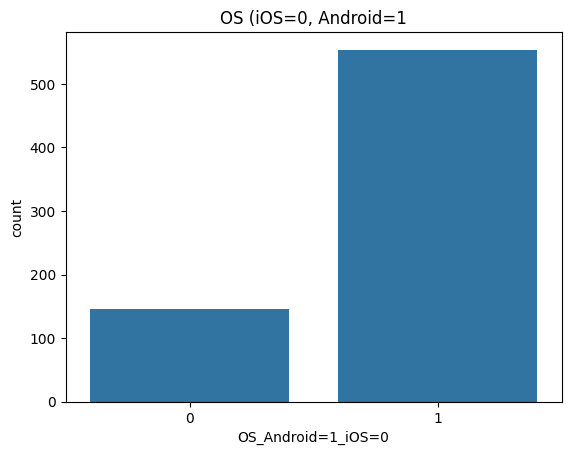

In [12]:
# Create a bar graph
sns.countplot(x='OS_Android=1_iOS=0', data=df)
plt.title('OS (iOS=0, Android=1')
plt.show()

TJR: Now save off the changed dataset to use moving forward with the models.


In [13]:
df.to_csv('transformed_user_behavior.csv', index=False)

TJR: With the full dataset saved, create a heatmap after dropping the only remaining column that is not numerical.

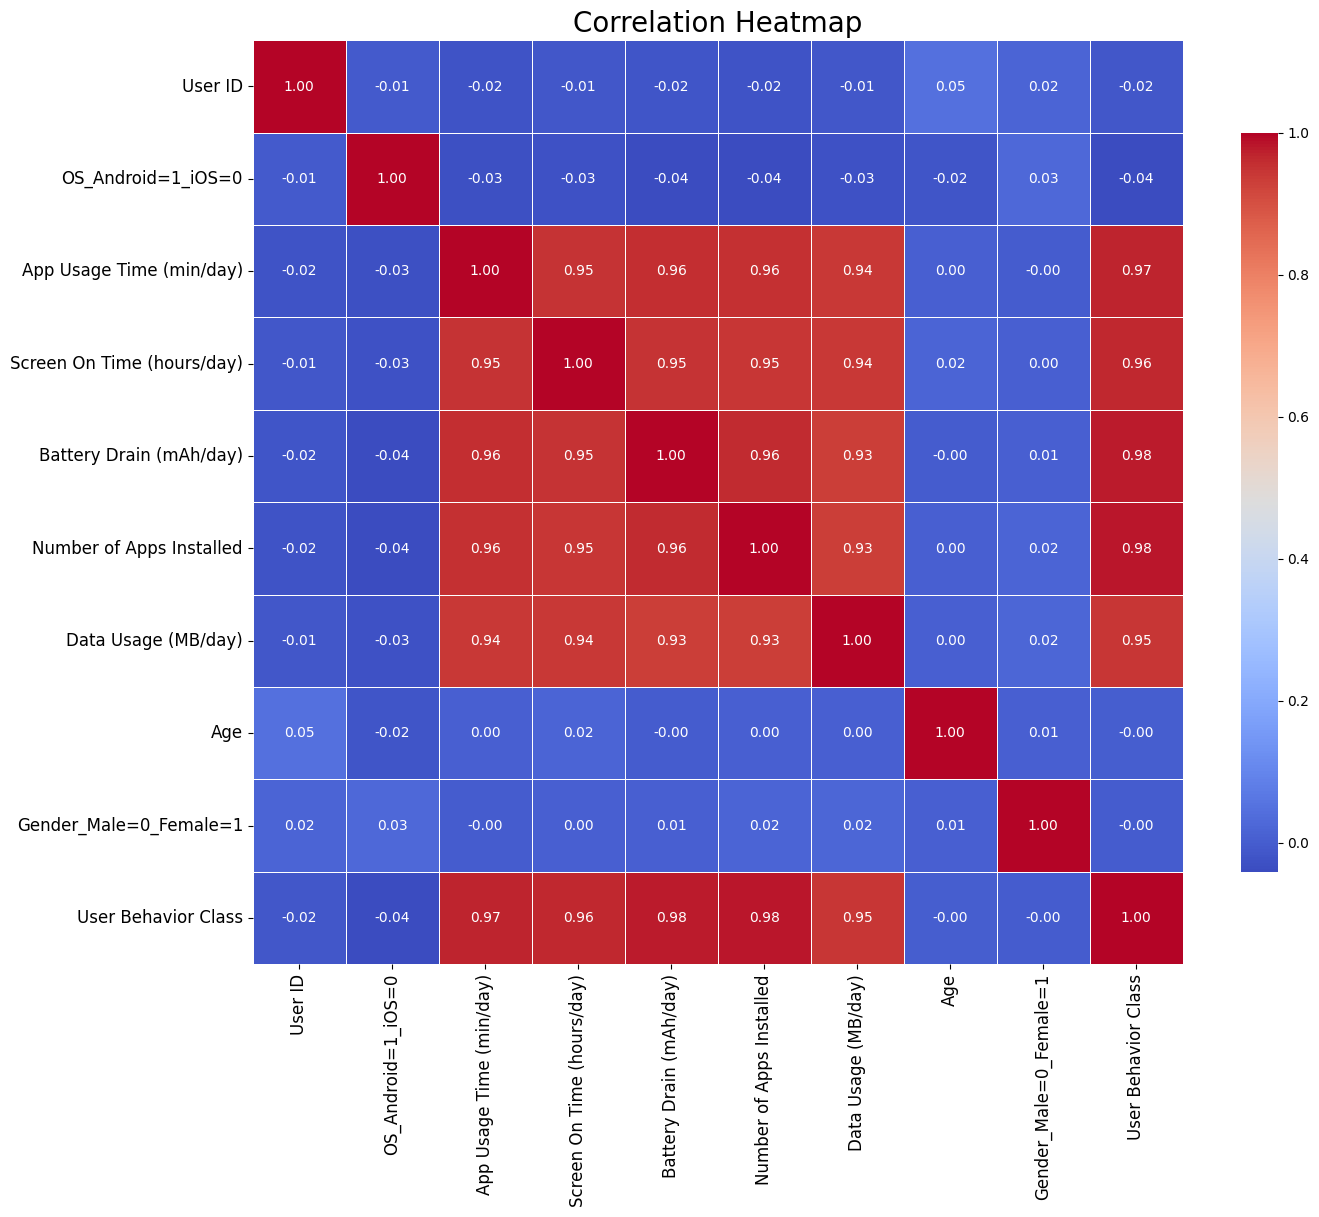

In [14]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation heatmap
corr = numeric_df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


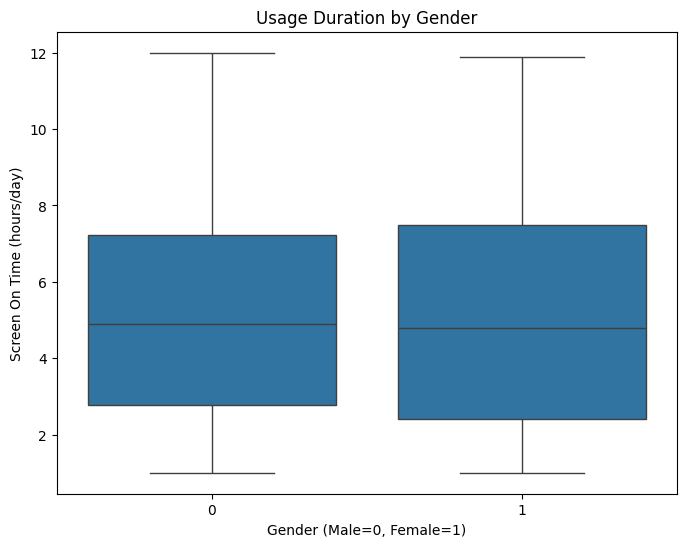

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender_Male=0_Female=1', y='Screen On Time (hours/day)', data=df)
plt.title('Usage Duration by Gender')
plt.xlabel('Gender (Male=0, Female=1)')
plt.ylabel('Screen On Time (hours/day)')
plt.show()


The boxplot for screen-on time by gender reveals differences in device usage patterns between male and female users. This helps in personalizing mobile experiences and tailoring app designs to different user segments based on behavior.

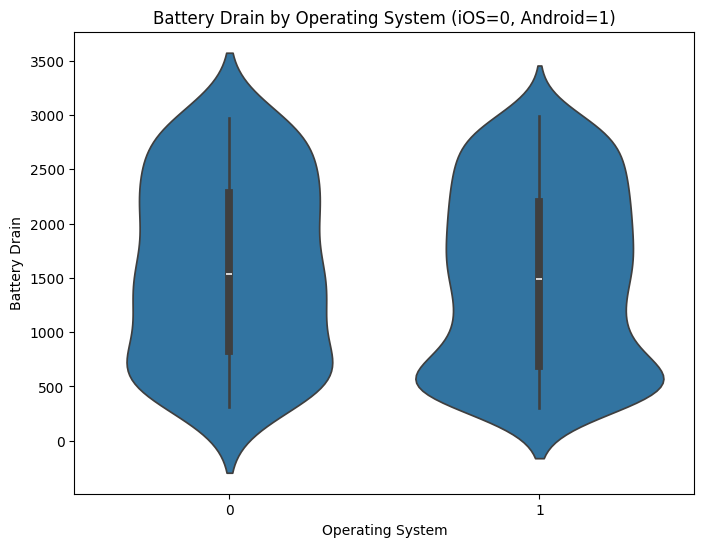

In [16]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='OS_Android=1_iOS=0', y='Battery Drain (mAh/day)', data=df)
plt.title('Battery Drain by Operating System (iOS=0, Android=1)')
plt.xlabel('Operating System')
plt.ylabel('Battery Drain')
plt.show()


The violin plot showing battery drain for Android vs. iOS users can guide optimization strategies for app developers to enhance battery performance based on operating systems. This distinction is crucial for apps targeting both platforms.


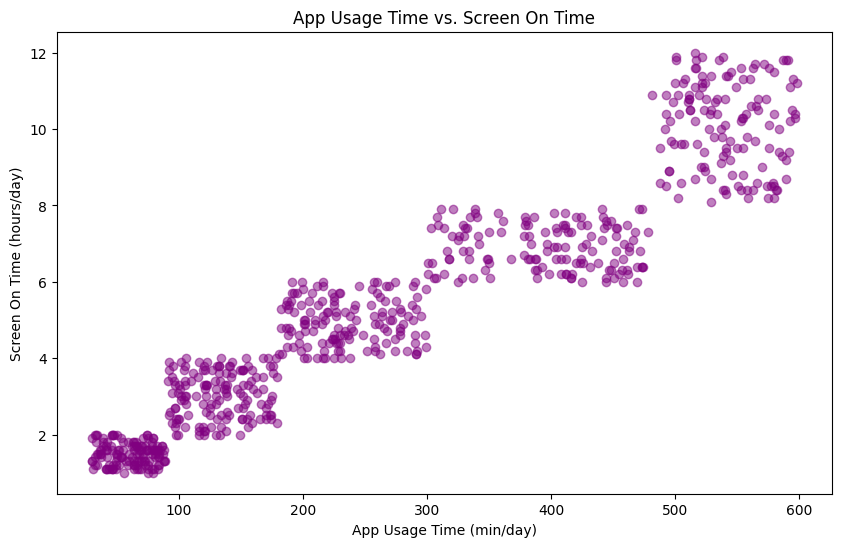

In [17]:

# Scatter plot of App Usage Time vs. Screen On Time
plt.figure(figsize=(10, 6))
plt.scatter(df['App Usage Time (min/day)'], df['Screen On Time (hours/day)'], alpha=0.5, color='purple')
plt.title('App Usage Time vs. Screen On Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Screen On Time (hours/day)')
plt.show()


The scatter plot reflects how app usage time correlates with overall device usage. This is important for understanding the intensity of app interactions and designing app features that align with user behavior patterns to improve engagement.

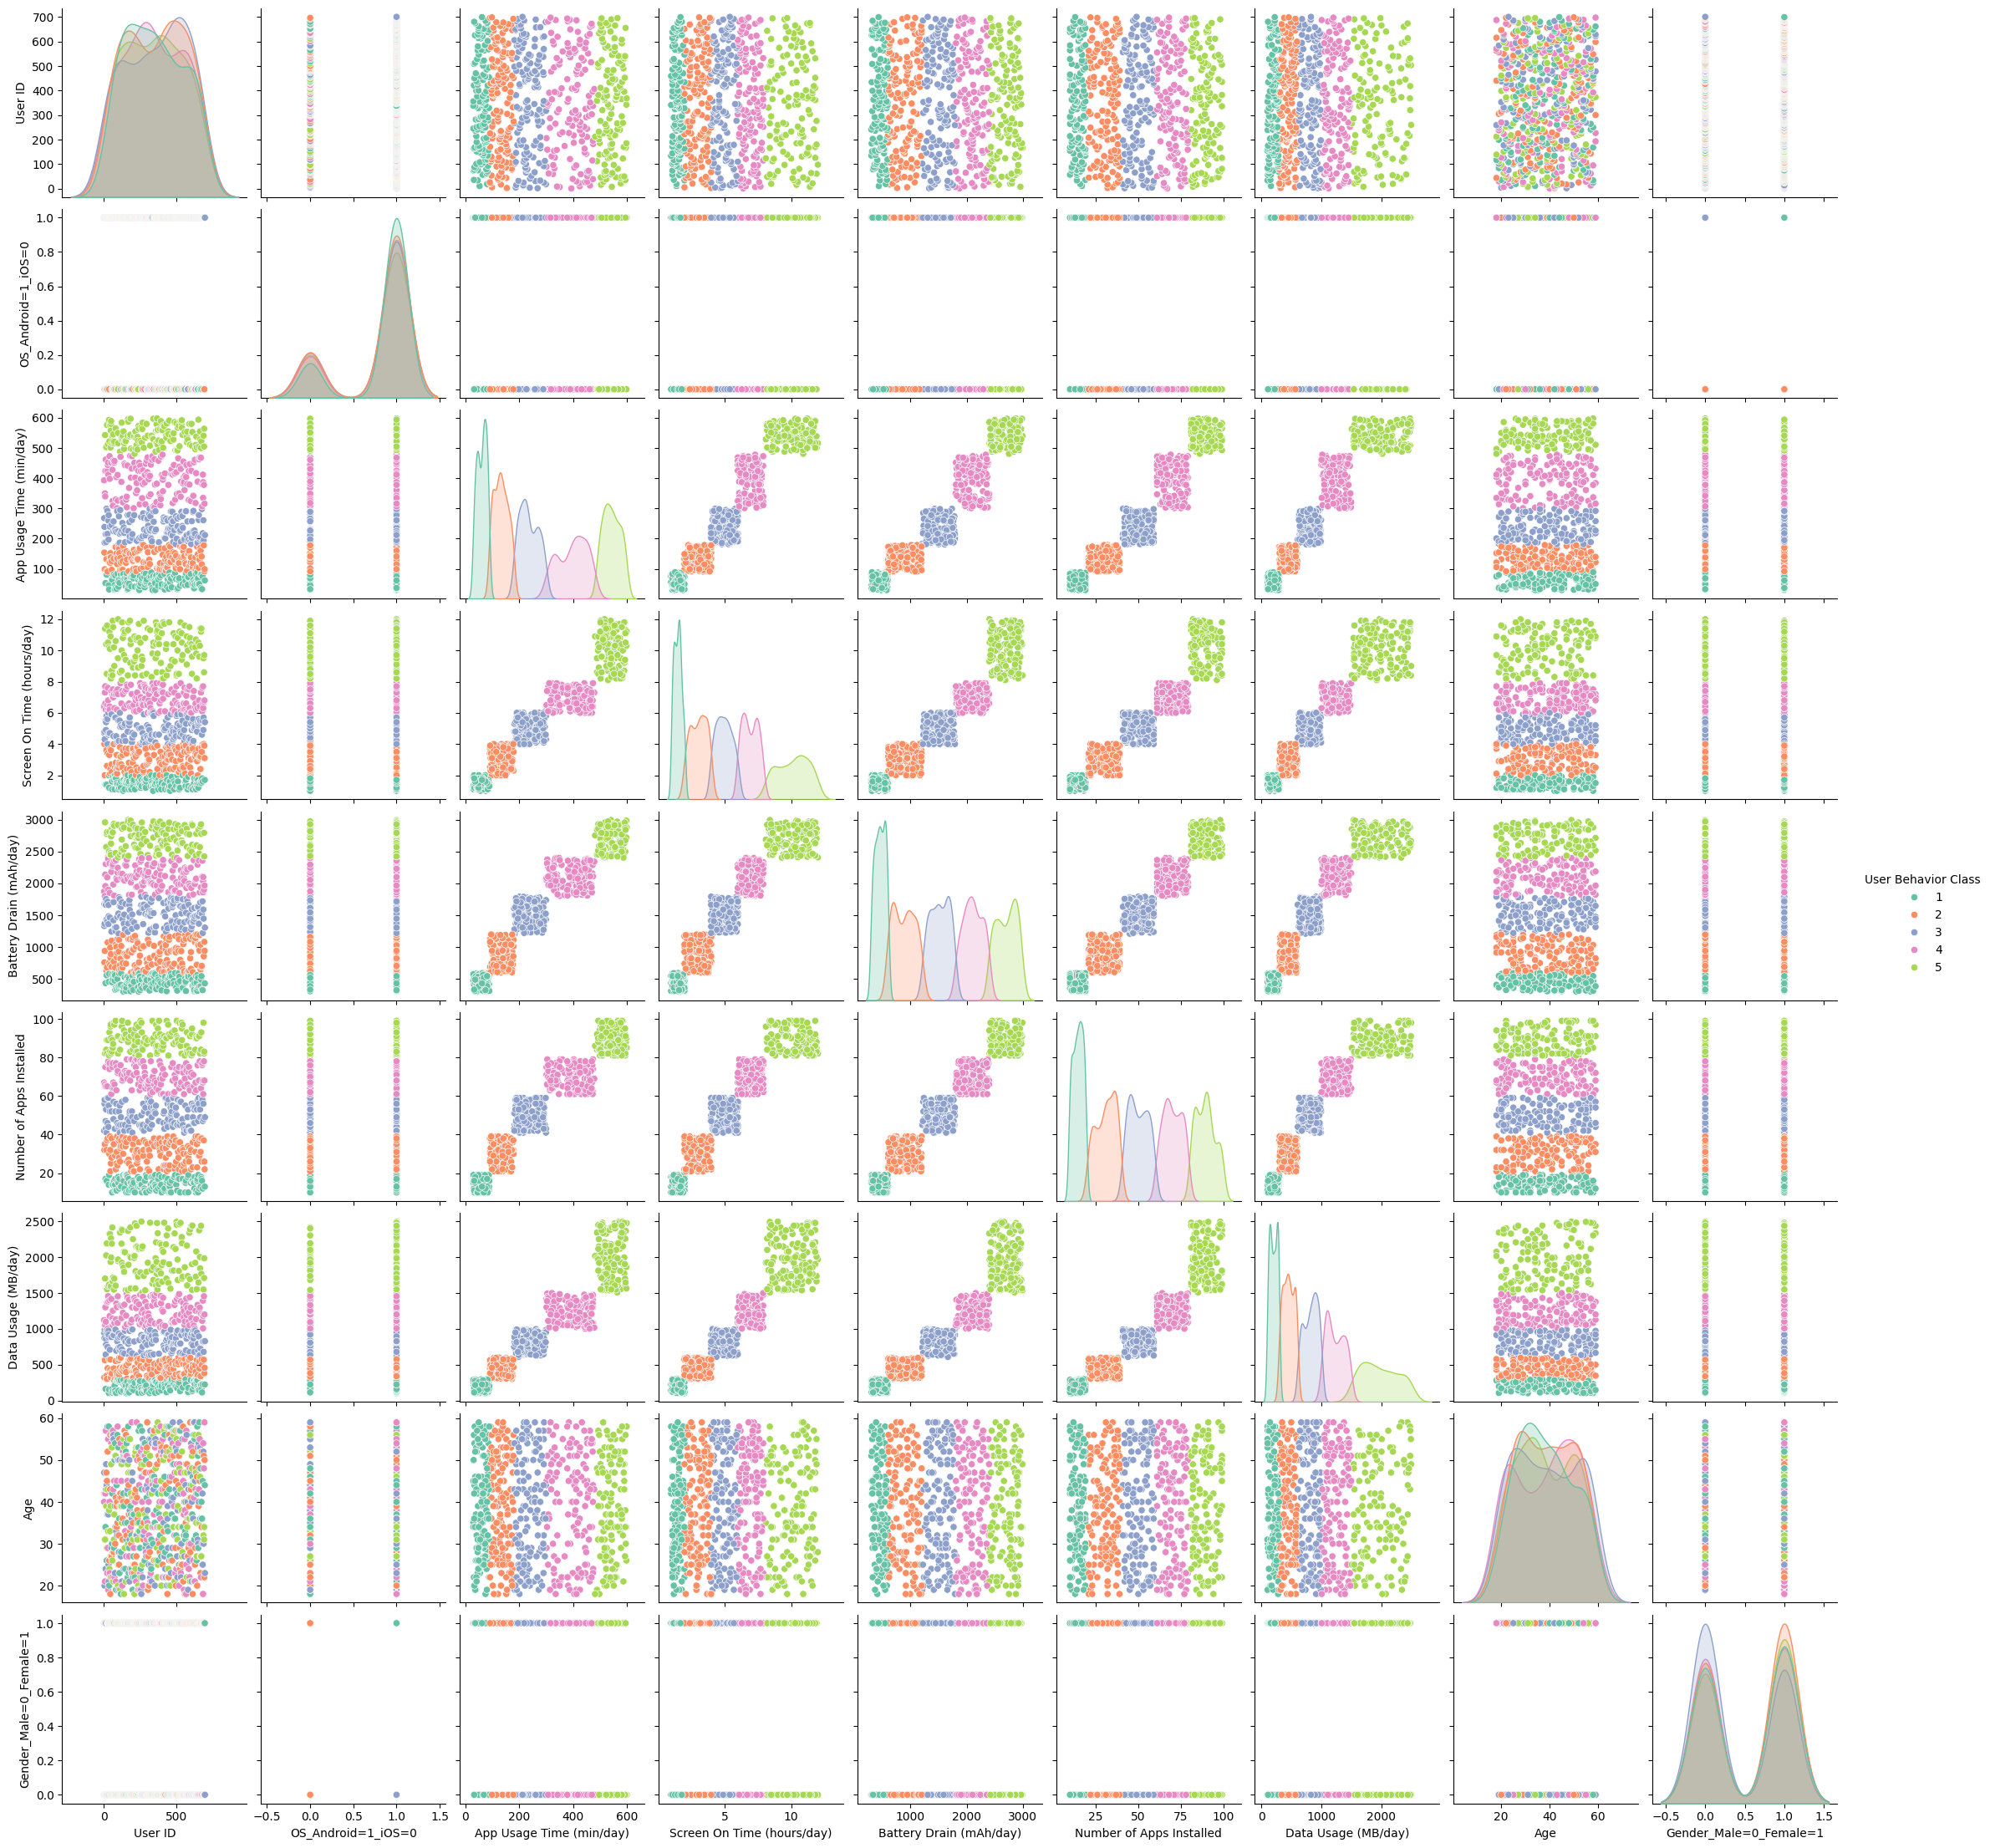

In [18]:
sns.pairplot(df, hue="User Behavior Class", palette="Set2")
plt.show()

This plot visualizes the relationship between different variables and user behavior classes, aiding in predictive modeling for app engagement. Behavioral segmentation based on these patterns can enhance personalization and app recommendations.

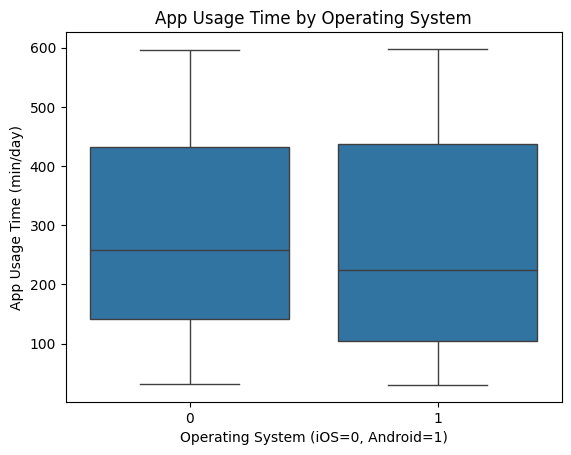

In [19]:
sns.boxplot(x='OS_Android=1_iOS=0', y='App Usage Time (min/day)', data=df)
plt.title('App Usage Time by Operating System')
plt.xlabel('Operating System (iOS=0, Android=1)')
plt.ylabel('App Usage Time (min/day)')
plt.show()


This would help understand how app engagement varies between platforms and guide platform-specific optimization strategies.

This could help assess whether users with more apps installed tend to have longer sessions, revealing multi-app usage patterns.

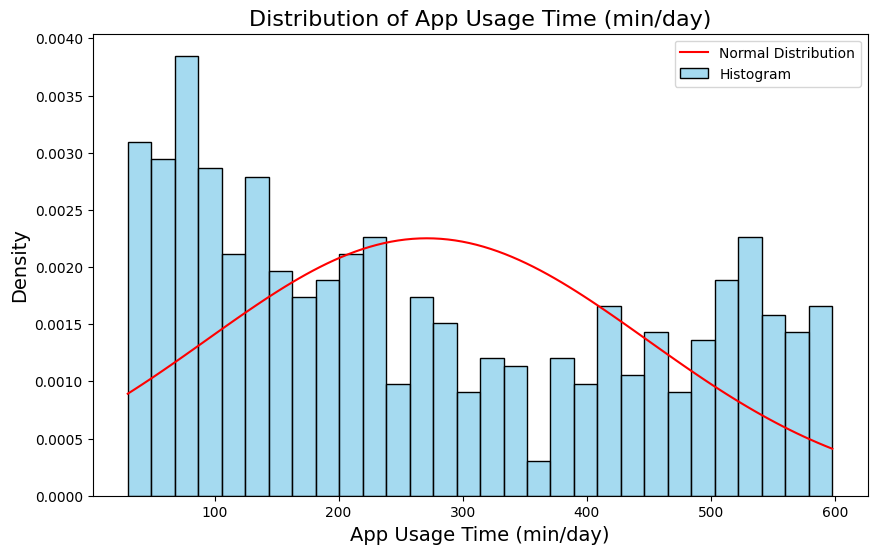

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# Plot histogram with normal distribution curve for 'App Usage Time (min/day)'
feature = 'App Usage Time (min/day)'
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(df[feature], kde=False, bins=30, color='skyblue', stat='density', label='Histogram')

# Overlay normal distribution curve
mean, std = df[feature].mean(), df[feature].std()
x = np.linspace(df[feature].min(), df[feature].max(), 100)
plt.plot(x, norm.pdf(x, mean, std), color='red', label='Normal Distribution')

# Add title and labels
plt.title(f'Distribution of {feature}', fontsize=16)
plt.xlabel(feature, fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()



In [21]:
df

User ID        Device Model  OS_Android=1_iOS=0  \
0          1      Google Pixel 5                   1   
1          2           OnePlus 9                   1   
2          3        Xiaomi Mi 11                   1   
3          4      Google Pixel 5                   1   
4          5           iPhone 12                   0   
..       ...                 ...                 ...   
695      696           iPhone 12                   0   
696      697        Xiaomi Mi 11                   1   
697      698      Google Pixel 5                   1   
698      699  Samsung Galaxy S21                   1   
699      700           OnePlus 9                   1   

     App Usage Time (min/day)  Screen On Time (hours/day)  \
0                         393                         6.4   
1                         268                         4.7   
2                         154                         4.0   
3                         239                         4.8   
4                         187                         4.3   
..                        ...                         ...   
695                        92                         3.9   
696                       316                         6.8   
697                        99                         3.1   
698                        62                         1.7   
699                       212                         5.4   

     Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
0                       1872                        67                 1122   
1                       1331                        42                  944   
2                        761                        32                  322   
3                       1676                        56                  871   
4                       1367                        58                  988   
..                       ...                       ...                  ...   
695                     1082                        26                  381   
696                     1965                        68                 1201   
697                      942                        22                  457   
698                      431                        13                  224   
699                     1306                        49                  828   

     Age  Gender_Male=0_Female=1  User Behavior Class  
0     40                       1                    4  
1     47                       0                    3  
2     42                       1                    2  
3     20                       1                    3  
4     31                       0                    3  
..   ...                     ...                  ...  
695   22                       1                    2  
696   59                       1                    4  
697   50                       0                    2  
698   44                       1                    1  
699   23                       0                    3  

[700 rows x 11 columns]

## Model Training and Fine-Tuning

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Split data into features and labels
X = df.drop(columns=['User ID', 'User Behavior Class','Device Model','Age','Screen On Time (hours/day)'])  # Adjust 'target' to your actual label column name
y = df['User Behavior Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Desicion Tree Feature Importance And Random Classifier Model

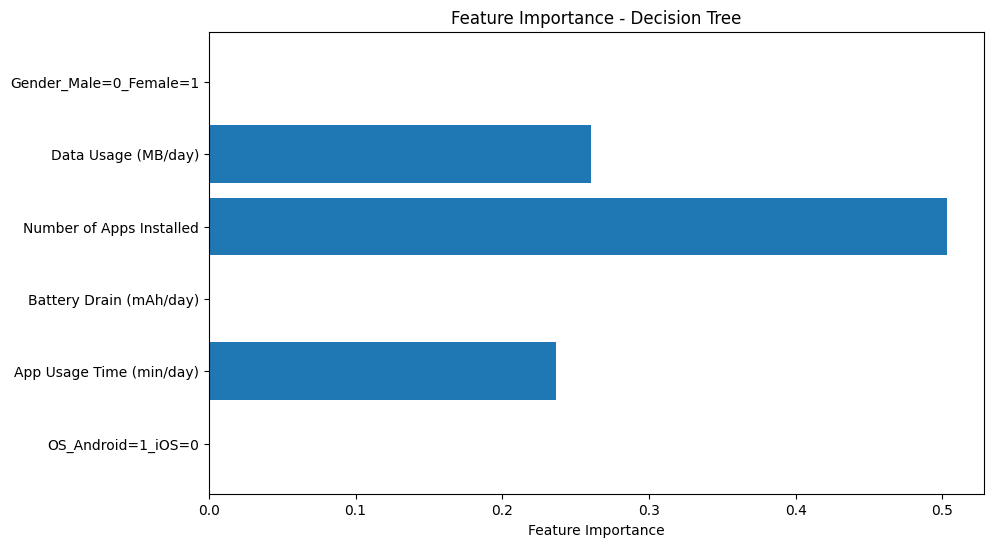

In [23]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Define the Decision Tree model (without training on the data for classification)
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the entire training data to extract feature importance
dt_model.fit(X_train, y_train)

# Get feature importances
feature_importance = dt_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
ax = plt.barh(np.arange(len(feature_importance)), feature_importance, align='center')
plt.yticks(np.arange(len(feature_importance)), X_train.columns)  # Ensure X_train.columns contains feature names
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Decision Tree')

# Show the plot
plt.show()


Accuracy of the best Random Forest model: 1.0000

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



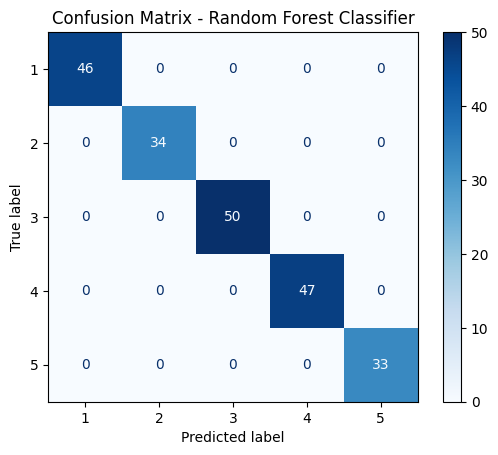

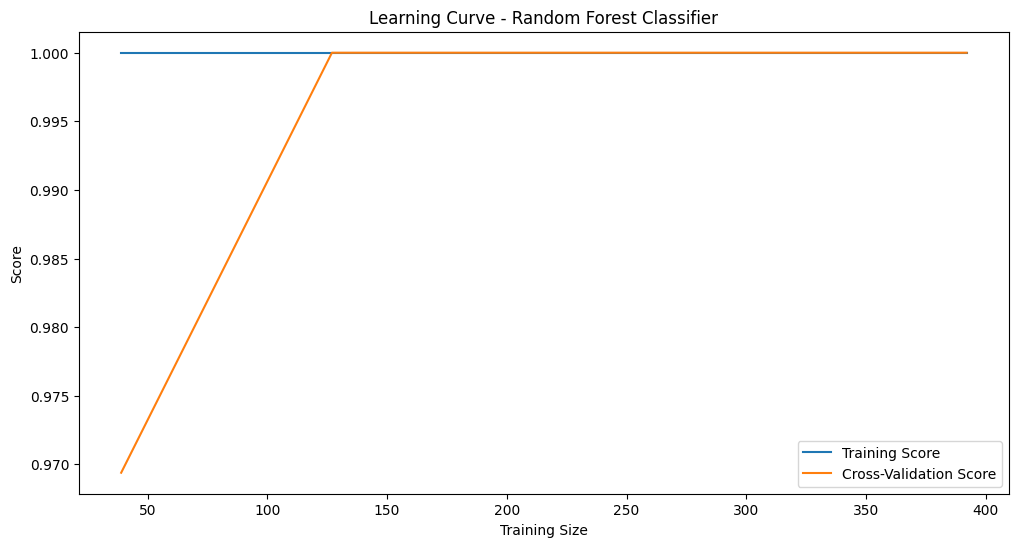

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


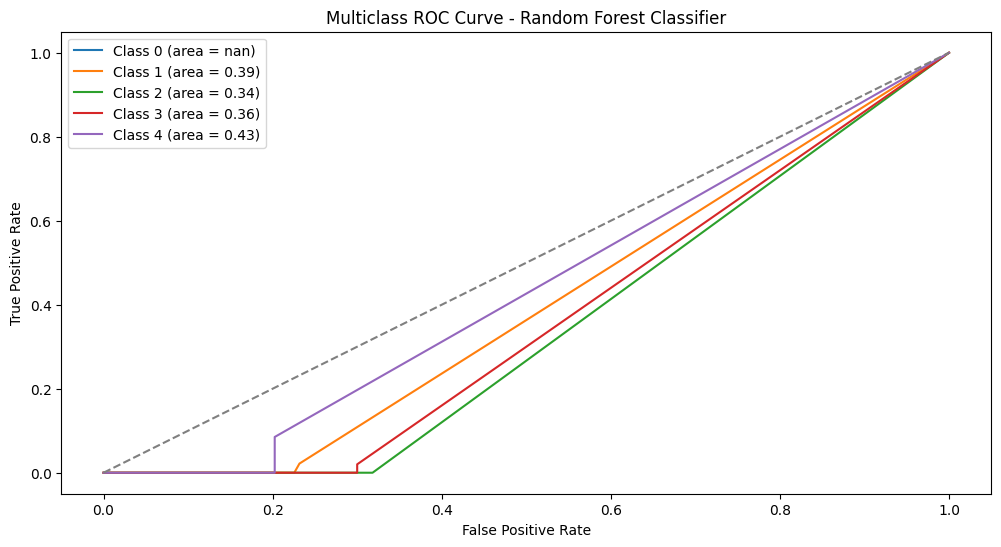


Model Performance Summary:
Accuracy: 1.0000
Class 0 - ROC AUC: nan
Class 1 - ROC AUC: 0.39
Class 2 - ROC AUC: 0.34
Class 3 - ROC AUC: 0.36
Class 4 - ROC AUC: 0.43


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Random Forest model training and hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search for RF model
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Extract the best estimator
best_rf = rf_grid_search.best_estimator_

# Predict on the test set to calculate accuracy
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy of the best Random Forest model: {accuracy:.4f}')

# Print classification report (precision, recall, f1-score for each class)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

# Generate the learning curve for the best Random Forest estimator
train_sizes, train_scores, test_scores = learning_curve(best_rf, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.title('Learning Curve - Random Forest Classifier')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

# Use OneVsRestClassifier for multiclass ROC curve calculation
ovr_model = OneVsRestClassifier(best_rf)
y_prob = ovr_model.fit(X_train, y_train).predict_proba(X_test)

# Calculate ROC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_train))  # Number of unique classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title('Multiclass ROC Curve - Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Model Performance Summary
print("\nModel Performance Summary:")
print(f"Accuracy: {accuracy:.4f}")
for i in range(n_classes):
    print(f"Class {i} - ROC AUC: {roc_auc[i]:.2f}")


Overall Summary
Strengths: The Random Forest model has excellent training and cross-validation performance, indicating strong generalization without overfitting.
Weaknesses: However, the low AUC values in the multiclass ROC analysis suggest that the model might struggle with distinguishing certain classes, potentially due to data issues or multiclass complexity.
To improve multiclass ROC performance, you might consider adjusting the class distribution, feature engineering, or trying different models better suited for multiclass classification.

## Logistic Regression Model

In [25]:
X=df.drop(columns=['User Behavior Class','Device Model'],axis=1)
y=df['User Behavior Class']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=10 > n_features=9. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the best Logistic Regression model: 1.0000

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



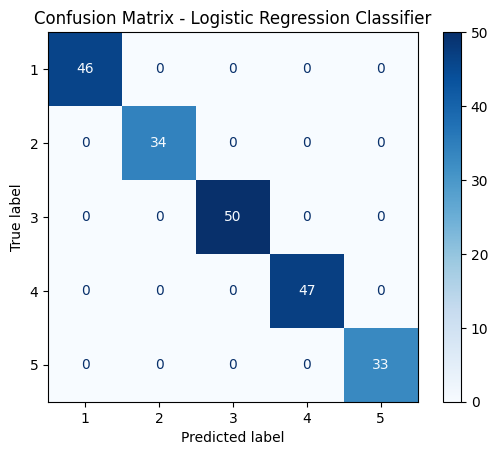

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=10 > n_features=9. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=10 > n_features=9. There will be no feature selection and all features will be kept.
  war

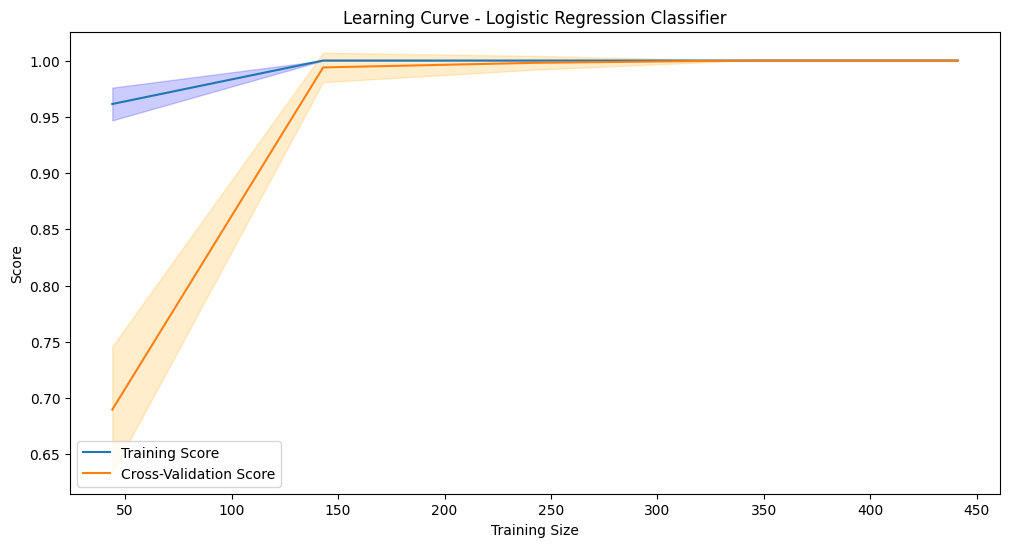

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=10 > n_features=9. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_sel

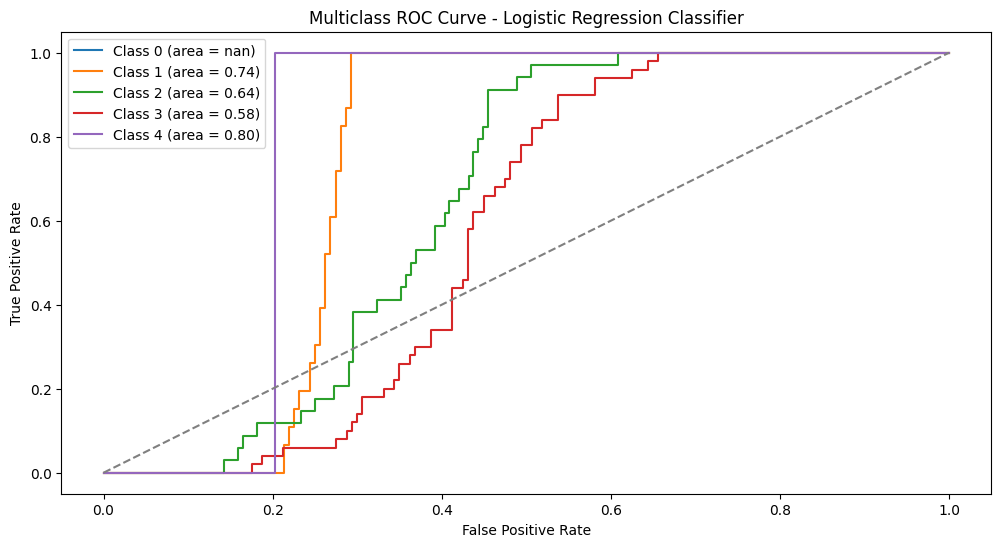

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# Standardize the data
scaler = StandardScaler()

# Define the Logistic Regression model with RFE for feature selection
log_reg_model = LogisticRegression(multi_class='multinomial', random_state=42, class_weight='balanced')

# Set up a pipeline to scale, select features, and then fit the Logistic Regression model
pipeline = Pipeline([
    ('scaler', scaler),
    ('feature_selection', RFE(log_reg_model, n_features_to_select=10)),  # Adjust `n_features_to_select` as needed
    ('log_reg', log_reg_model)
])

# Define a broader parameter grid for hyperparameter tuning
log_reg_param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'log_reg__max_iter': [100, 200, 500],  # Number of iterations for convergence
    'log_reg__solver': ['lbfgs', 'saga', 'newton-cg']  # Different solvers for comparison
}

# Grid search for Logistic Regression model
log_reg_grid_search = GridSearchCV(pipeline, log_reg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_grid_search.fit(X_train, y_train)

# Extract the best estimator
best_log_reg = log_reg_grid_search.best_estimator_

# Predict on the test set to calculate accuracy
y_pred = best_log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy of the best Logistic Regression model: {accuracy:.4f}')

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression Classifier')
plt.show()

# Generate an improved learning curve for the best Logistic Regression estimator with more cross-validation folds
train_sizes, train_scores, test_scores = learning_curve(best_log_reg, X_train, y_train, cv=10)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.fill_between(train_sizes, train_mean - np.std(train_scores, axis=1),
                 train_mean + np.std(train_scores, axis=1), color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - np.std(test_scores, axis=1),
                 test_mean + np.std(test_scores, axis=1), color="orange", alpha=0.2)
plt.title('Learning Curve - Logistic Regression Classifier')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

# Use OneVsRestClassifier for multiclass ROC curve calculation with cross-validated ROC
ovr_model = OneVsRestClassifier(best_log_reg)
y_prob = ovr_model.fit(X_train, y_train).predict_proba(X_test)

# Calculate ROC for each class with cross-validation
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_train))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Multiclass ROC Curve - Logistic Regression Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


## Support Vector Classifier

Accuracy of the best SVC model: 1.0000

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



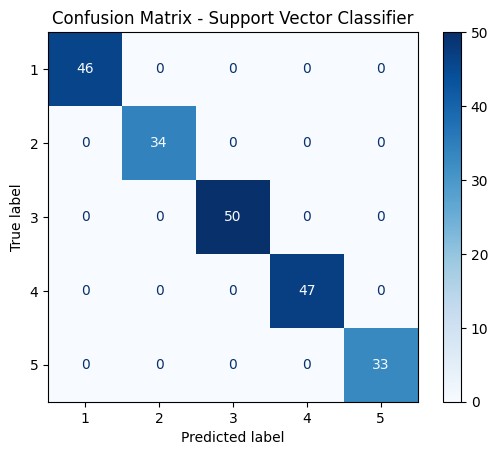

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


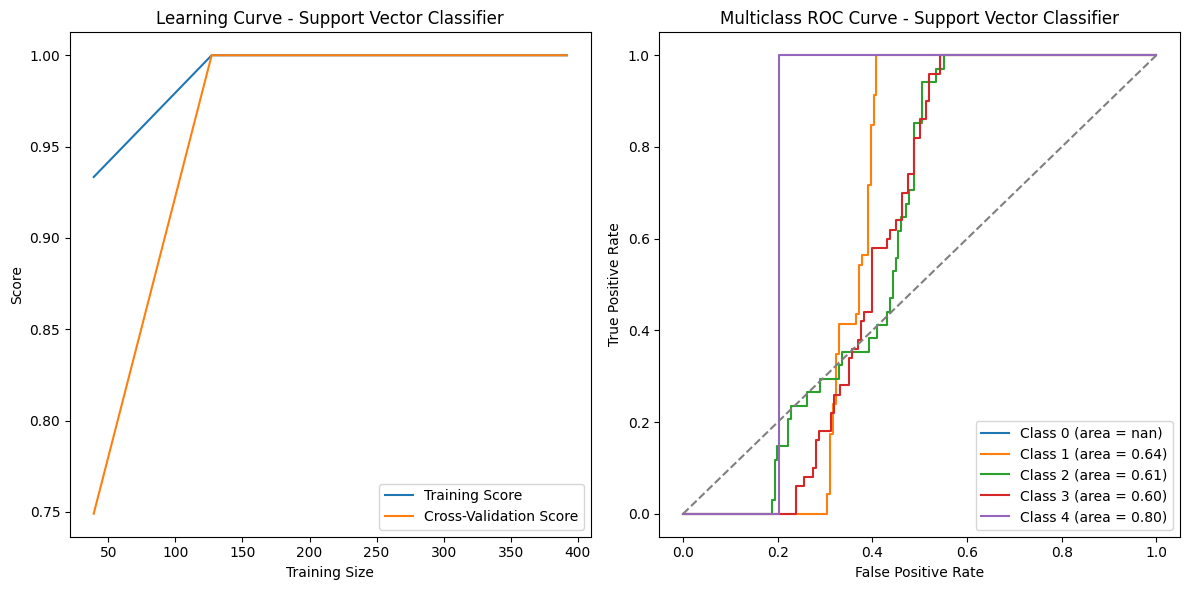

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, learning_curve, cross_val_score
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

# Define a pipeline with scaling and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, random_state=42, class_weight='balanced'))
])

# Define a more comprehensive parameter grid for hyperparameter tuning
svc_param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['linear']
}

# Perform grid search for hyperparameter tuning
svc_grid_search = GridSearchCV(pipeline, svc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid_search.fit(X_train, y_train)

# Extract the best estimator from the grid search
best_svc = svc_grid_search.best_estimator_

# Predict on the test set to calculate accuracy
y_pred = best_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy of the best SVC model: {accuracy:.4f}')

# Print classification report (precision, recall, f1-score for each class)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Support Vector Classifier')
plt.show()

# Generate the learning curve for the best SVC estimator
train_sizes, train_scores, test_scores = learning_curve(best_svc, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Left plot for Learning Curve
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.title('Learning Curve - Support Vector Classifier')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()

# Use OneVsRestClassifier for multiclass ROC curve calculation
ovr_model = OneVsRestClassifier(best_svc)
y_prob = ovr_model.fit(X_train, y_train).predict_proba(X_test)

# Calculate ROC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_train))  # Number of unique classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.subplot(1, 2, 2)  # Right plot for ROC Curve
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title('Multiclass ROC Curve - Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


Overall Summary
Strengths: The Support Vector Classifier has excellent training and cross-validation scores, indicating a well-generalized model without overfitting.


## Gradient Boosting  Model

Accuracy of the best Gradient Boosting model: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


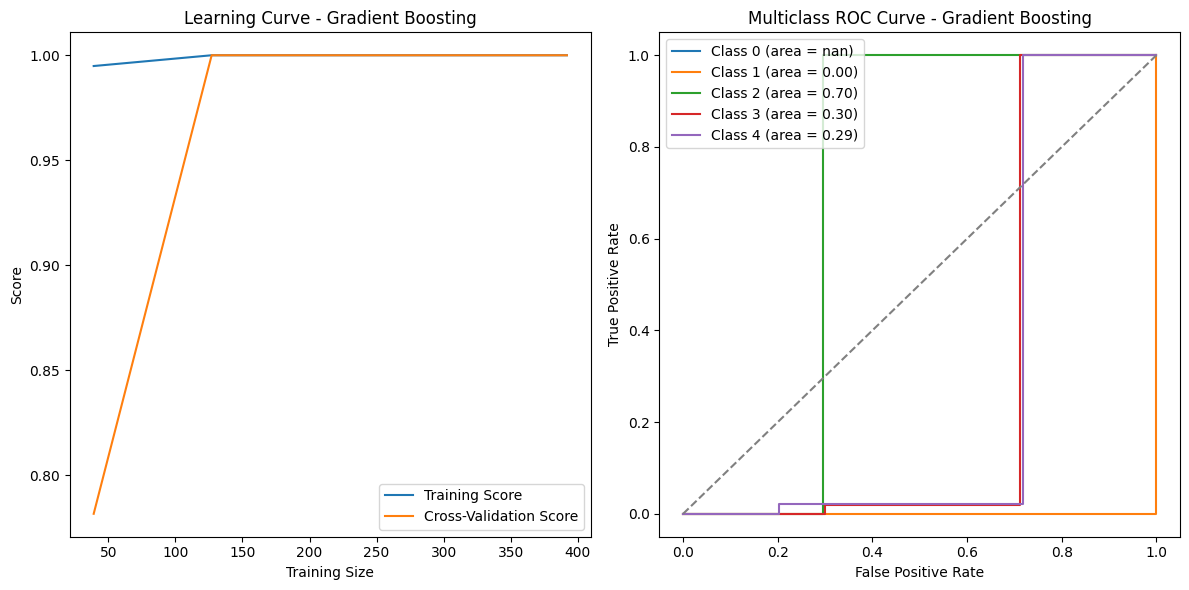

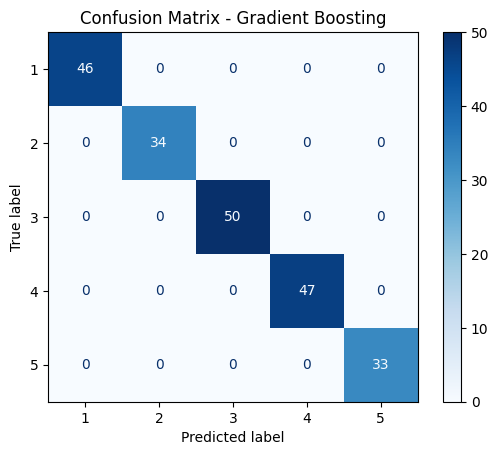

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Perform grid search for hyperparameter tuning
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

# Extract the best estimator from the grid search
best_gb = gb_grid_search.best_estimator_

# Predict on the test set to calculate accuracy
y_pred = best_gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy of the best Gradient Boosting model: {accuracy:.4f}')

# Generate the learning curve for the best Gradient Boosting estimator
train_sizes, train_scores, test_scores = learning_curve(best_gb, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Left plot for Learning Curve
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.title('Learning Curve - Gradient Boosting')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()

# Use OneVsRestClassifier for multiclass ROC curve calculation
ovr_model = OneVsRestClassifier(best_gb)
y_prob = ovr_model.fit(X_train, y_train).predict_proba(X_test)

# Calculate ROC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_train.nunique()  # Number of unique classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.subplot(1, 2, 2)  # Right plot for ROC Curve
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title('Multiclass ROC Curve - Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_gb.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()




## Kmeans Clustering Model

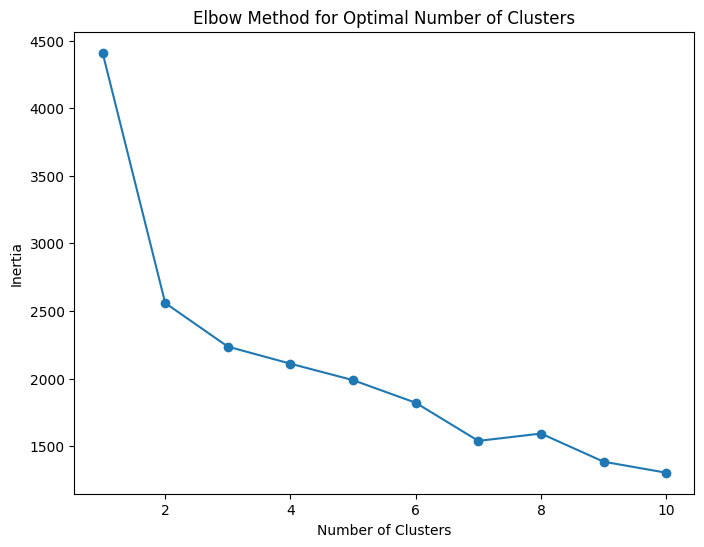

Adjusted Rand Index (ARI) for K-Means clustering: 0.3629


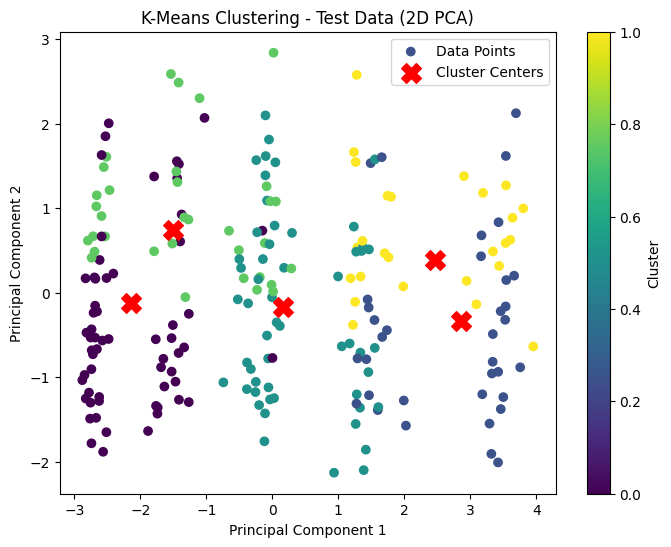

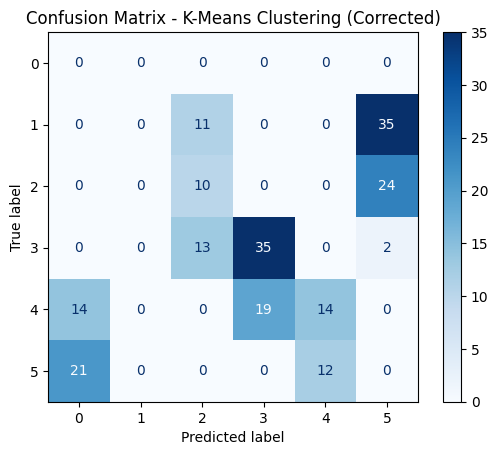

In [29]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt

# Ensure X_train and X_test are NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Determine the optimal number of clusters using the Elbow method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Set the optimal number of clusters based on the Elbow curve (or use the previous value)
optimal_clusters = len(np.unique(y_train))

# Define and fit the K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_train_scaled)

# Predict the cluster labels on the test data
y_kmeans_pred = kmeans.predict(X_test_scaled)

# Evaluate the clustering performance using Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(y_test, y_kmeans_pred)
print(f'Adjusted Rand Index (ARI) for K-Means clustering: {ari_score:.4f}')

# Use PCA for dimensionality reduction to 2D for visualization
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test_scaled)
cluster_centers_2d = pca.transform(kmeans.cluster_centers_)

# Plot the clusters with cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_kmeans_pred, cmap='viridis', marker='o', label='Data Points')
plt.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1], color='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering - Test Data (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

# Reassign cluster labels to match the true class labels using the Hungarian algorithm
cm = confusion_matrix(y_test, y_kmeans_pred)
row_ind, col_ind = linear_sum_assignment(-cm)  # Maximize the overlap
y_kmeans_pred_corrected = np.array([col_ind[label] for label in y_kmeans_pred])

# Compute and display the corrected confusion matrix
cm_corrected = confusion_matrix(y_test, y_kmeans_pred_corrected)

# Ensure that the number of unique labels matches the confusion matrix dimensions
unique_labels = np.unique(np.concatenate((y_test, y_kmeans_pred_corrected)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_corrected, display_labels=unique_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - K-Means Clustering (Corrected)')
plt.show()


## Model Evaluvation

In [31]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


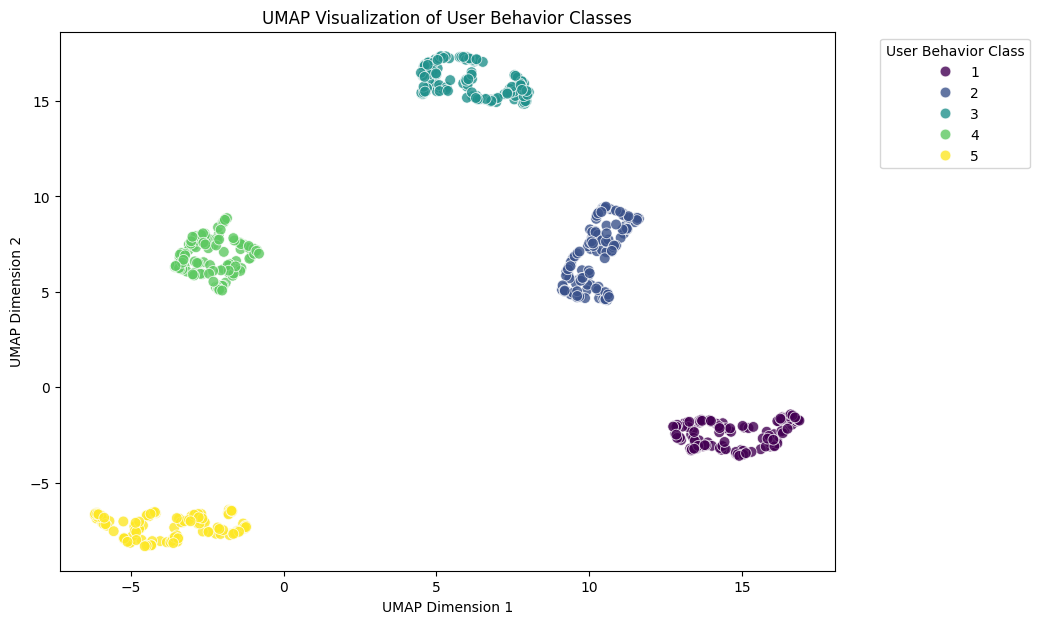

In [32]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Drop columns not needed for UMAP (adjust based on your dataset)
features = df.drop(columns=['User ID', 'Device Model', 'User Behavior Class'])  # Ensure to drop non-numerical columns
target = df['User Behavior Class']

# Encode categorical columns if there are any (e.g., 'Operating System')
for col in features.select_dtypes(include=['object']).columns:
    features[col] = LabelEncoder().fit_transform(features[col])

# Initialize and fit UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_projection = umap_model.fit_transform(features)

# Plot UMAP results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=umap_projection[:, 0], y=umap_projection[:, 1], hue=target, palette="viridis", s=60, alpha=0.8)
plt.title("UMAP Visualization of User Behavior Classes")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title='User Behavior Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


UMAP Visualization of User Behavior Classes

This code utilizes UMAP (Uniform Manifold Approximation and Projection) for dimensionality reduction
to visualize user behavior classes in a 2D plot. The steps include:

1. **Data Preparation**:
   - The 'User ID', 'Device Model', and 'User Behavior Class' columns are dropped as they are not needed for UMAP.
   - Categorical features in the data are encoded using `LabelEncoder` to convert them into numerical format.

2. **UMAP Initialization and Fitting**:
   - A UMAP model is initialized with parameters:
     - `n_neighbors=15`: Number of neighboring points used in local approximations.
     - `min_dist=0.1`: Minimum distance between points in the low-dimensional space.
     - `n_components=2`: Number of dimensions in the output.
     - `random_state=42`: Random state for reproducibility.
   - The UMAP model is fitted to the features, resulting in a 2D projection of the data.

3. **Plotting the UMAP Results**:
   - The UMAP projection is visualized using a scatter plot.
   - Each data point is colored based on its 'User Behavior Class'.
   - The plot includes labels for the axes ('UMAP Dimension 1' and 'UMAP Dimension 2') and a legend indicating the user behavior classes.

**X-Axis and Y-Axis**:
- These axes represent the two UMAP dimensions resulting from the dimensionality reduction process.
- They encapsulate the variance in the high-dimensional data and project it onto a 2D space for visualization.

**Conclusion**:
- The UMAP plot effectively separates different user behavior classes into distinct clusters.
- The clusters are well-separated, indicating that the UMAP model successfully captured the underlying structure of the data.
- The visualization is clear and informative, with appropriate labels and a legend for ease of interpretation.

Note: The parameters `n_neighbors` and `min_dist` can be adjusted based on the specific characteristics of the dataset to optimize the UMAP projection.


## Conclusion

The Random Classifier, Gradient Boosting achieved perfect classification scores, Logistic Regression performed well with high, slightly lower scores. K-means showed moderate clustering with a 0.598 Silhouette Score. Overall, Random Classifier and K-means were identified as top models.

In [33]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [36]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import joblib

# Load the dataset
df = pd.read_csv("transformed_user_behavior.csv")
# Drop 'User ID' during EDA
X = df.drop(columns=['User ID', 'User Behavior Class'])
y = df['User Behavior Class']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define and train the SVC model with hyperparameter tuning
svc_model = SVC(probability=True, random_state=42)
svc_param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']}
svc_grid_search = GridSearchCV(svc_model, svc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid_search.fit(X_train, y_train)
best_svc = svc_grid_search.best_estimator_

# Save the model
joblib.dump(best_svc, "svc_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [37]:
import gradio as gr
import joblib
import numpy as np
import pandas as pd

# Load the saved model
best_svc = joblib.load("svc_model.pkl")

# Define mappings for categorical inputs
# Make the display show the category name while it corresponds to a number when submitting
# The requested parameters to the model
os_map = {"iOS": 0, "Android": 1}
gender_map = {"Male": 0, "Female": 1}
device_model_map = {'Xiaomi Mi 11': 1, 'iPhone 12': 2, 'Google Pixel 5': 3, 'OnePlus 9': 4, 'Samsung Galaxy S21': 5}

# Predict function
# Bring in input validation and error display to ensure there is no hanging or erroring out
def predict(os, device_models, app_usage_time, screen_on_time, battery_drain, num_apps_installed, data_usage, age, gender):
    missing_fields = []

    # Check for missing inputs from the user when submit button is pressed
    if not os:
        missing_fields.append("Operating System")
    if not device_models:
        missing_fields.append("Device Model")
    if age is None:
        missing_fields.append("Age")
    if not gender:
        missing_fields.append("Gender")
    if app_usage_time is None:
        missing_fields.append("App Usage Time")
    if screen_on_time is None:
        missing_fields.append("Screen On Time")
    if battery_drain is None:
        missing_fields.append("Battery Drain")
    if num_apps_installed is None:
        missing_fields.append("Number of Apps Installed")
    if data_usage is None:
        missing_fields.append("Data Usage")

    if missing_fields:
        error_message = f"<span style='color:red; font-weight:bold;'>Error: Please fill in the following fields: {', '.join(missing_fields)}.</span>"
        return gr.update(value=error_message, visible=True), {}

    try:
        os_numeric = os_map[os]
        gender_numeric = gender_map[gender]
        device_model_numeric = device_model_map[device_models]

        user_input = np.array([
            device_model_numeric,
            os_numeric,
            app_usage_time,
            screen_on_time,
            battery_drain,
            num_apps_installed,
            data_usage,
            age,
            gender_numeric
        ]).reshape(1, -1)

        columns = ['Device_Models', 'OS_Android=1_iOS=0', 'App Usage Time (min/day)',
                   'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
                   'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender_Male=0_Female=1']
        user_input_df = pd.DataFrame(user_input, columns=columns)

        prediction_prob = best_svc.predict_proba(user_input_df)
        #The numbers were skewed by -1 when performing the modeling and this needs to be added back in
        #For creating the output for the UI
        predicted_class = np.argmax(prediction_prob) + 1
        predicted_prob = prediction_prob[0]
        class_probabilities = {f'Class {i + 1}': prob for i, prob in enumerate(predicted_prob)}

        return gr.update(value="", visible=False), class_probabilities
    except Exception as e:
        print(f"Error during prediction: {e}")
        return gr.update(value="Prediction Error", visible=True), {}

# Function to clear outputs whenever the user changes an input after hitting the Submit button
def clear_outputs():
    return gr.update(value="", visible=False), gr.update(value=None)

# Define the Gradio layout
with gr.Blocks() as demo:
    gr.Markdown("<div style='text-align: center;font-size: 48px; font-weight: bold;'>Mobile Device Usage Classes</div>")
    gr.Markdown("<div style='text-align: center;font-size: 16px;'>Median Values Provided to Start</div>")

    with gr.Row() as top_row:
        age_input = gr.Number(label="Age", value=38, minimum=10, maximum=99, precision=0)
        gender_input = gr.Radio(choices=["Male", "Female"], label="Gender")
        os_input = gr.Radio(choices=["iOS", "Android"], label="Operating System (OS)")

    with gr.Row(visible=False) as second_row:
        device_model_input = gr.Radio(
            choices=["Xiaomi Mi 11", "iPhone 12", "Google Pixel 5", "OnePlus 9", "Samsung Galaxy S21"],
            label="Device Model"
        )

    with gr.Column(visible=False) as sliders_section:
        app_usage_input = gr.Slider(minimum=0, maximum=720, step=1, value=271, label="App Usage Time (min/day)")
        screen_on_time_input = gr.Slider(minimum=0, maximum=24, step=0.25, value=5.25, label="Screen On Time (hours/day)")
        battery_drain_input = gr.Slider(minimum=100, maximum=5000, step=1, value=1525, label="Battery Drain (mAh/day)")
        num_apps_input = gr.Slider(minimum=30, maximum=150, step=1, value=51, label="Number of Apps Installed")
        data_usage_input = gr.Slider(minimum=0, maximum=5000, step=1, value=929, label="Data Usage (MB/day)")
        submit_button = gr.Button("Submit")
        output_probabilities = gr.Label(num_top_classes=None, label="Class Probabilities")
        error_message_output = gr.HTML(label="Error Message", visible=False)

    def check_top_row(age, gender, os):
        if age and gender and os:
            if os == "iOS":
                return gr.update(visible=True), gr.update(value="iPhone 12")
            return gr.update(visible=True), gr.update(value=None)
        return gr.update(visible=False), gr.update(value=None)

    def check_device_model(device_models):
        if device_models:
            return gr.update(visible=True)
        return gr.update(visible=False)

    # Change inputs reset the output
    inputs = [age_input, gender_input, os_input, device_model_input, app_usage_input,
              screen_on_time_input, battery_drain_input, num_apps_input, data_usage_input]
    for input_element in inputs:
        input_element.change(clear_outputs, [], [error_message_output, output_probabilities])

    age_input.change(check_top_row, [age_input, gender_input, os_input], [second_row, device_model_input])
    gender_input.change(check_top_row, [age_input, gender_input, os_input], [second_row, device_model_input])
    os_input.change(check_top_row, [age_input, gender_input, os_input], [second_row, device_model_input])
    device_model_input.change(check_device_model, [device_model_input], sliders_section)

    submit_button.click(
        predict,
        inputs=[os_input, device_model_input, app_usage_input, screen_on_time_input, battery_drain_input, num_apps_input,
                data_usage_input, age_input, gender_input],
        outputs=[error_message_output, output_probabilities]
    )

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://653067bd234e78fe6e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
